<a href="https://colab.research.google.com/github/MennaMahmoud116/R-Project-2/blob/main/Huntington's_disease_%7C_Microarray_Analysis_%7C_R_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ahmed Ibrahim - Menna Mahmoud - Ahmed Saleh 
---

### Genome-wide expression profiling of human blood reveals biomarkers for Huntington’s disease

### Microarray Analysis of Global Gene Expression Changes in Blood of HD Patients.

Step 1: Loading the Data

In [ ]:
data = read.table("https://raw.githubusercontent.com/ahmedmoustafa/Notebooks/master/data/GSE8762.tsv", header = TRUE, row.names = 1)

In [ ]:
head(data)

,Ctrl,Ctrl.1,Ctrl.2,Ctrl.3,Ctrl.4,Ctrl.5,Ctrl.6,Ctrl.7,Ctrl.8,Ctrl.9,⋯,HD.2,HD.3,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1007_s_at,4.470743,4.106371,4.250723,4.307392,4.472751,4.431072,4.438347,4.661193,4.385541,4.574276,⋯,4.183164,4.490961,4.479748,4.743991,4.761571,5.056403,4.646087,4.248499,4.482893,4.429024
1053_at,4.240539,3.884524,4.406298,4.495615,4.449388,4.474055,4.612255,4.636787,4.755574,3.946940,⋯,4.459884,4.442183,4.185731,4.446729,4.737934,4.128148,4.646523,4.656500,4.427695,4.517921
117_at,7.010033,6.159936,7.389481,7.164196,5.881538,6.530623,6.281878,6.934200,6.163215,4.742801,⋯,6.274195,6.264710,6.632870,5.899714,6.495365,5.915077,7.207986,7.142161,6.136245,5.552721
121_at,5.124296,5.288773,4.898886,5.090574,5.033592,4.899812,5.012739,5.066847,4.933144,5.181290,⋯,4.876803,5.166027,5.498876,5.241227,5.177292,5.362947,5.308740,4.965022,5.242114,4.848019
1255_g_at,2.501567,2.506750,2.530077,2.547677,2.538049,2.413584,2.440608,2.548037,2.615246,2.419638,⋯,2.561662,2.548711,2.523970,2.648301,2.567536,2.540918,2.468736,2.515317,2.556229,2.528127
1294_at,7.675864,7.812648,7.529129,7.330338,7.661243,7.358759,7.574180,7.462183,6.970292,8.021221,⋯,7.479841,7.879082,7.277842,8.100791,7.253172,8.196144,7.828541,7.382417,7.384194,7.449746


Step 2: Converting the data frame to a matrix

In [ ]:
data = as.matrix(data)

Step 3: Checking

In [ ]:
dim(data)
#54675 is the number of transcripts / genes
#22 is the number of test subjects

[1] 54675    22

In [ ]:
head(data)

,Ctrl,Ctrl.1,Ctrl.2,Ctrl.3,Ctrl.4,Ctrl.5,Ctrl.6,Ctrl.7,Ctrl.8,Ctrl.9,⋯,HD.2,HD.3,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11
1007_s_at,4.470743,4.106371,4.250723,4.307392,4.472751,4.431072,4.438347,4.661193,4.385541,4.574276,⋯,4.183164,4.490961,4.479748,4.743991,4.761571,5.056403,4.646087,4.248499,4.482893,4.429024
1053_at,4.240539,3.884524,4.406298,4.495615,4.449388,4.474055,4.612255,4.636787,4.755574,3.946940,⋯,4.459884,4.442183,4.185731,4.446729,4.737934,4.128148,4.646523,4.656500,4.427695,4.517921
117_at,7.010033,6.159936,7.389481,7.164196,5.881538,6.530623,6.281878,6.934200,6.163215,4.742801,⋯,6.274195,6.264710,6.632870,5.899714,6.495365,5.915077,7.207986,7.142161,6.136245,5.552721
121_at,5.124296,5.288773,4.898886,5.090574,5.033592,4.899812,5.012739,5.066847,4.933144,5.181290,⋯,4.876803,5.166027,5.498876,5.241227,5.177292,5.362947,5.308740,4.965022,5.242114,4.848019
1255_g_at,2.501567,2.506750,2.530077,2.547677,2.538049,2.413584,2.440608,2.548037,2.615246,2.419638,⋯,2.561662,2.548711,2.523970,2.648301,2.567536,2.540918,2.468736,2.515317,2.556229,2.528127
1294_at,7.675864,7.812648,7.529129,7.330338,7.661243,7.358759,7.574180,7.462183,6.970292,8.021221,⋯,7.479841,7.879082,7.277842,8.100791,7.253172,8.196144,7.828541,7.382417,7.384194,7.449746


Step 4: Assigning Variables to the matrix.

In [ ]:
number_of_genes = nrow(data)
number_of_genes

[1] 54675

In [ ]:
ids = row.names(data)
head(ids)

[1] "1007_s_at" "1053_at"   "117_at"    "121_at"    "1255_g_at" "1294_at"

Step 5: Exploring and checking the behavior of the data

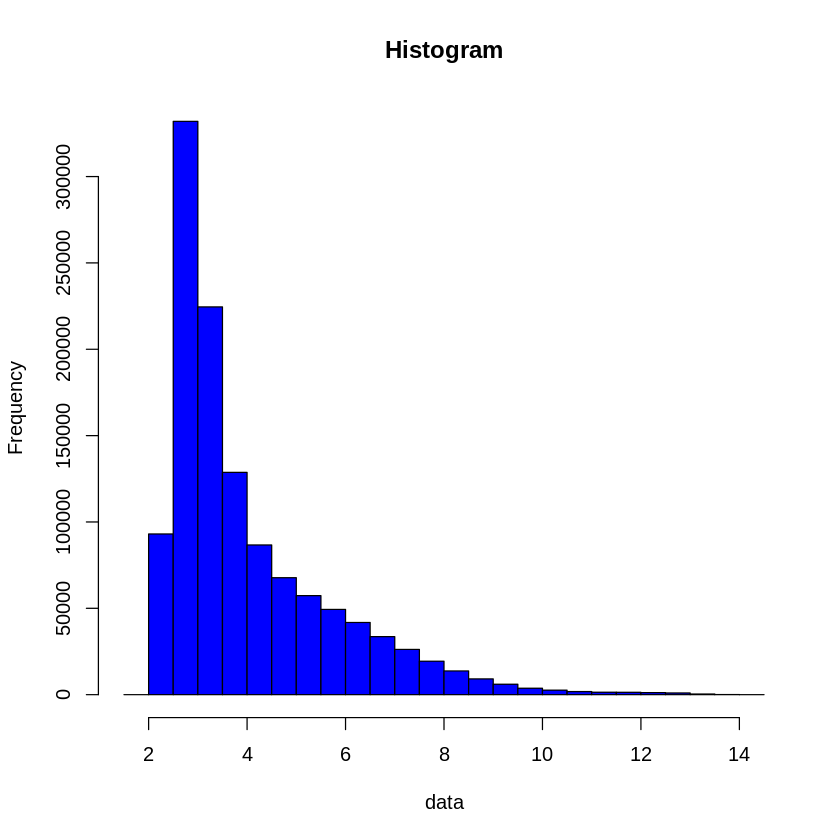

In [ ]:
hist(data, col = "blue", main="Histogram")

X-axis is the expression values.

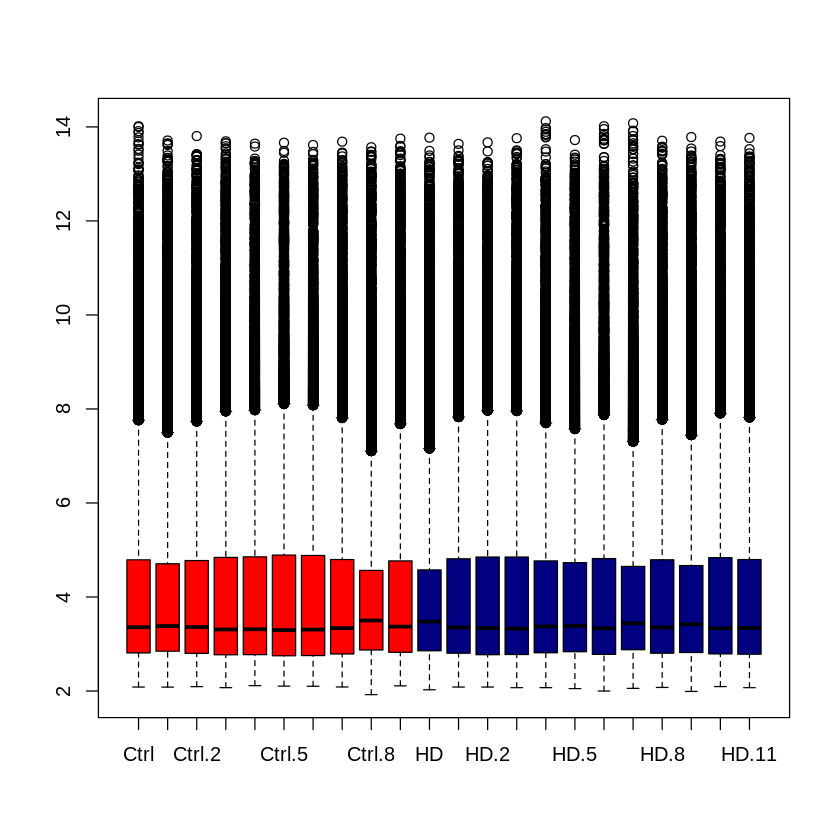

In [ ]:
colors = c(rep("red", 10), rep("navy", 12))
boxplot(data, col = colors)

They are similar overall.

[1] "Ctrl"   "Ctrl.1" "Ctrl.2" "Ctrl.3" "Ctrl.4" "Ctrl.5" "Ctrl.6" "Ctrl.7"
 [9] "Ctrl.8" "Ctrl.9" "HD"     "HD.1"   "HD.2"   "HD.3"   "HD.4"   "HD.5"  
[17] "HD.6"   "HD.7"   "HD.8"   "HD.9"   "HD.10"  "HD.11"

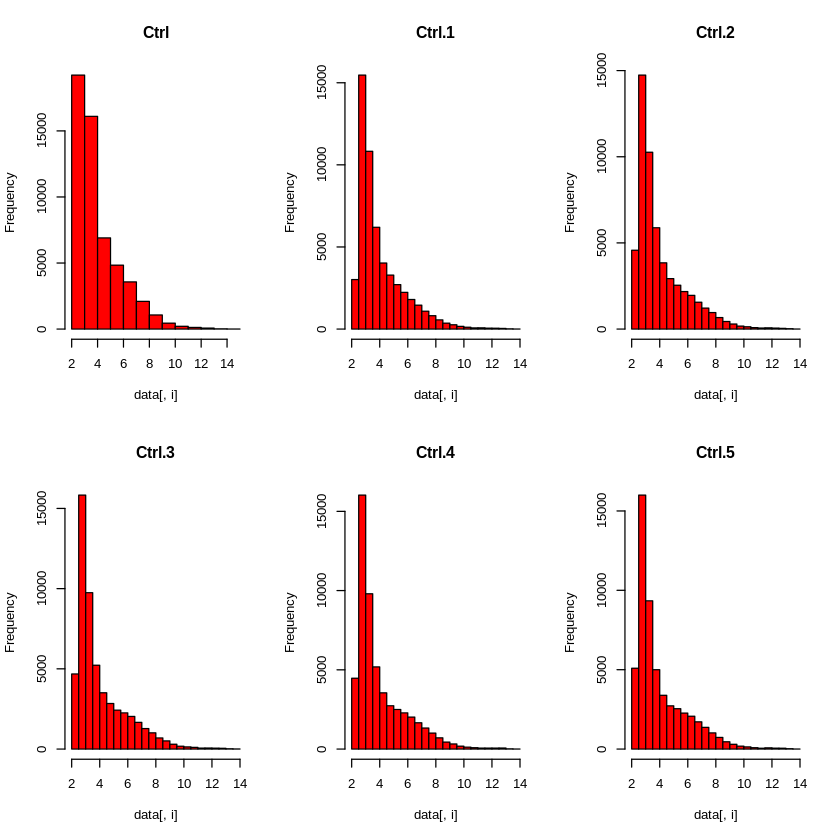

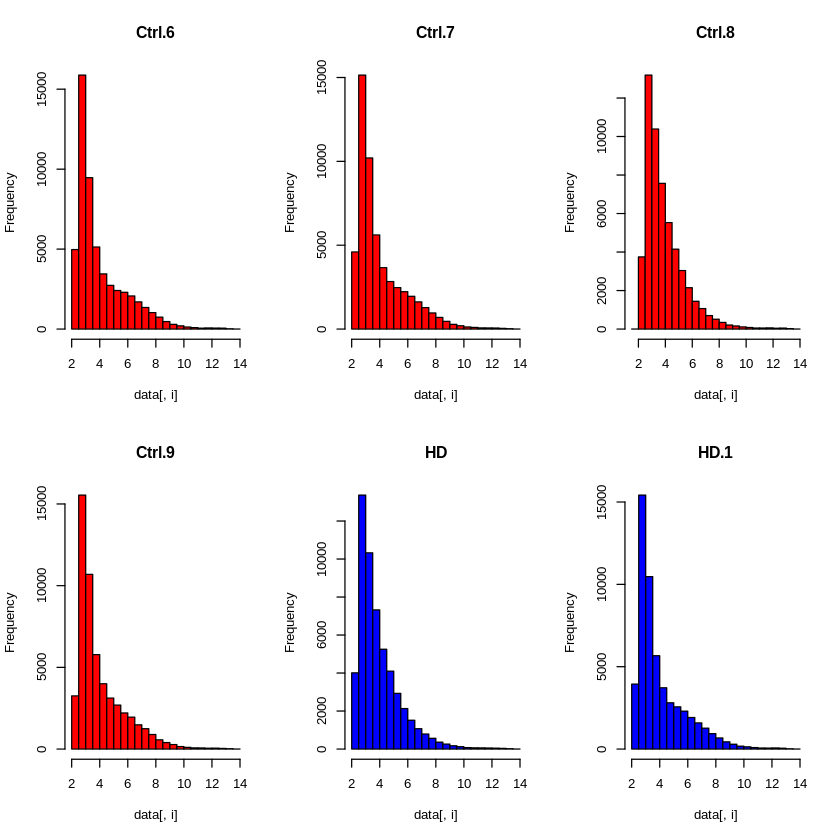

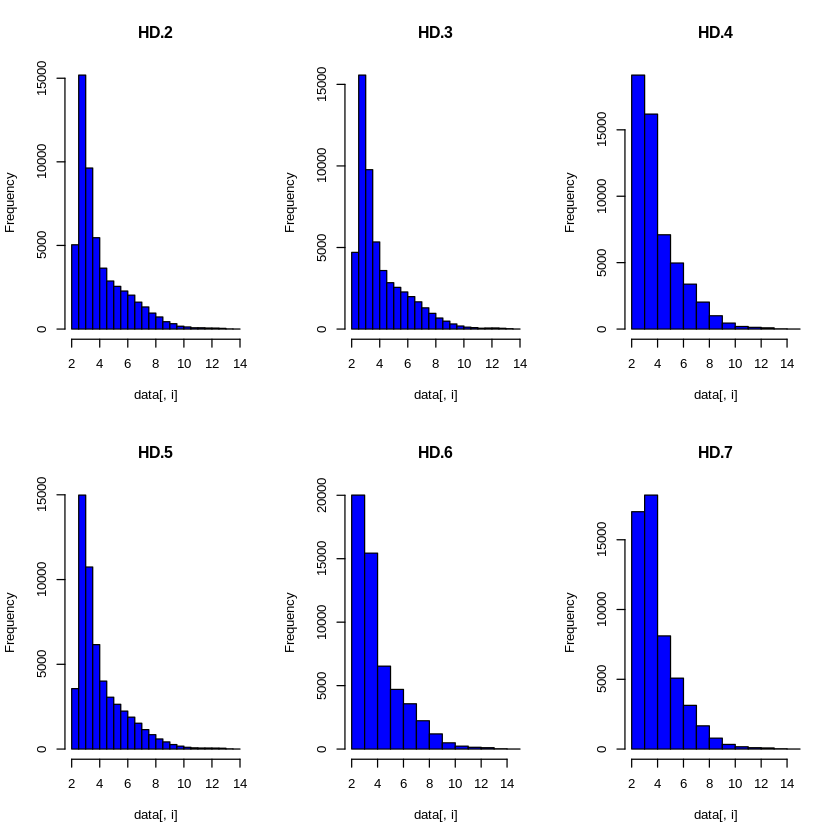

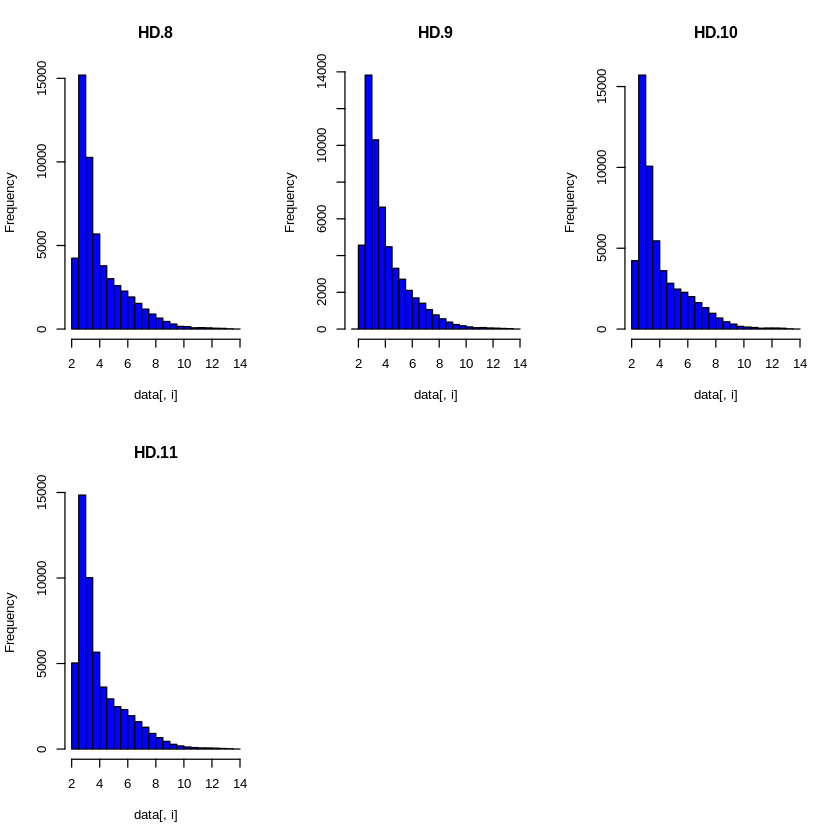

In [ ]:
samples = colnames(data)
samples
par(mfrow = c(2,3))
for(i in 1:10) {
  hist(data[, i], col = "red", main = samples[i])
}
for(i in 11:22) {
  hist(data[, i], col = "blue", main = samples [i])
}

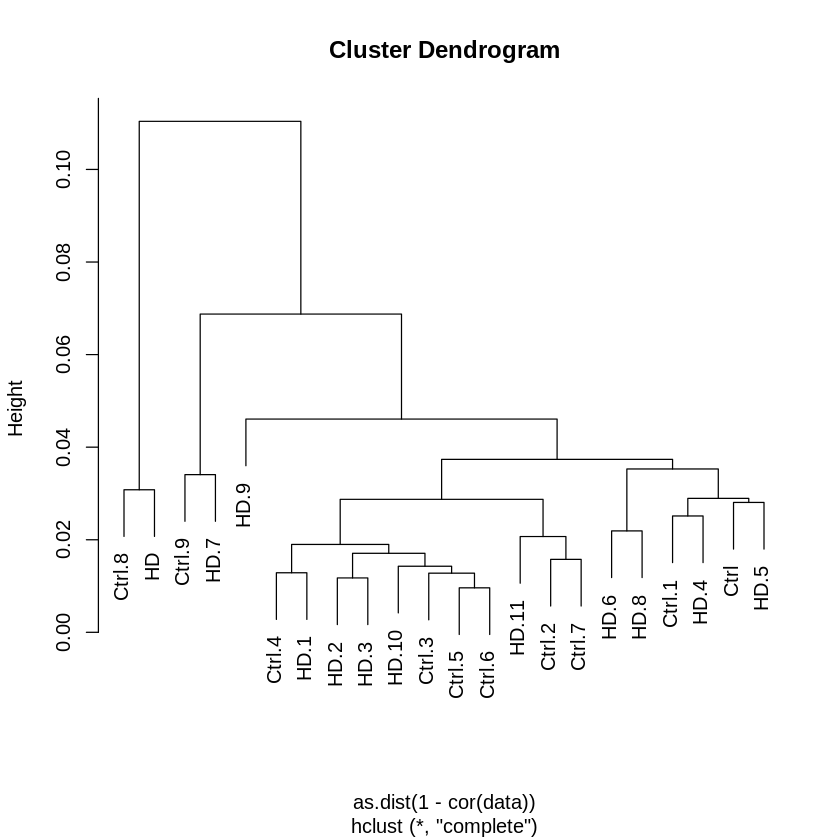

In [ ]:
hc = hclust(as.dist(1-cor(data)))
plot(hc)

Step 6: Split data matrix into two

In [ ]:
Ctrl = data[,1:10]
head(Ctrl)

,Ctrl,Ctrl.1,Ctrl.2,Ctrl.3,Ctrl.4,Ctrl.5,Ctrl.6,Ctrl.7,Ctrl.8,Ctrl.9
1007_s_at,4.470743,4.106371,4.250723,4.307392,4.472751,4.431072,4.438347,4.661193,4.385541,4.574276
1053_at,4.240539,3.884524,4.406298,4.495615,4.449388,4.474055,4.612255,4.636787,4.755574,3.946940
117_at,7.010033,6.159936,7.389481,7.164196,5.881538,6.530623,6.281878,6.934200,6.163215,4.742801
121_at,5.124296,5.288773,4.898886,5.090574,5.033592,4.899812,5.012739,5.066847,4.933144,5.181290
1255_g_at,2.501567,2.506750,2.530077,2.547677,2.538049,2.413584,2.440608,2.548037,2.615246,2.419638
1294_at,7.675864,7.812648,7.529129,7.330338,7.661243,7.358759,7.574180,7.462183,6.970292,8.021221


In [ ]:
HD = data[, 11:22]
head(HD)

,HD,HD.1,HD.2,HD.3,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11
1007_s_at,4.151353,4.858000,4.183164,4.490961,4.479748,4.743991,4.761571,5.056403,4.646087,4.248499,4.482893,4.429024
1053_at,4.567436,4.421296,4.459884,4.442183,4.185731,4.446729,4.737934,4.128148,4.646523,4.656500,4.427695,4.517921
117_at,6.820924,6.605083,6.274195,6.264710,6.632870,5.899714,6.495365,5.915077,7.207986,7.142161,6.136245,5.552721
121_at,5.027643,5.089622,4.876803,5.166027,5.498876,5.241227,5.177292,5.362947,5.308740,4.965022,5.242114,4.848019
1255_g_at,2.666954,2.446089,2.561662,2.548711,2.523970,2.648301,2.567536,2.540918,2.468736,2.515317,2.556229,2.528127
1294_at,7.554453,7.694754,7.479841,7.879082,7.277842,8.100791,7.253172,8.196144,7.828541,7.382417,7.384194,7.449746


Step 7: Mean Expression

In [ ]:
Ctrl.means = rowMeans(Ctrl)
head(Ctrl.means)

1007_s_at   1053_at    117_at    121_at 1255_g_at   1294_at 
 4.409841  4.390198  6.425790  5.052995  2.506123  7.539586

In [ ]:
HD.means = rowMeans(HD)
head(HD.means)

1007_s_at   1053_at    117_at    121_at 1255_g_at   1294_at 
 4.544308  4.469832  6.412254  5.150361  2.547712  7.623415

Step 8: Scatter Plot

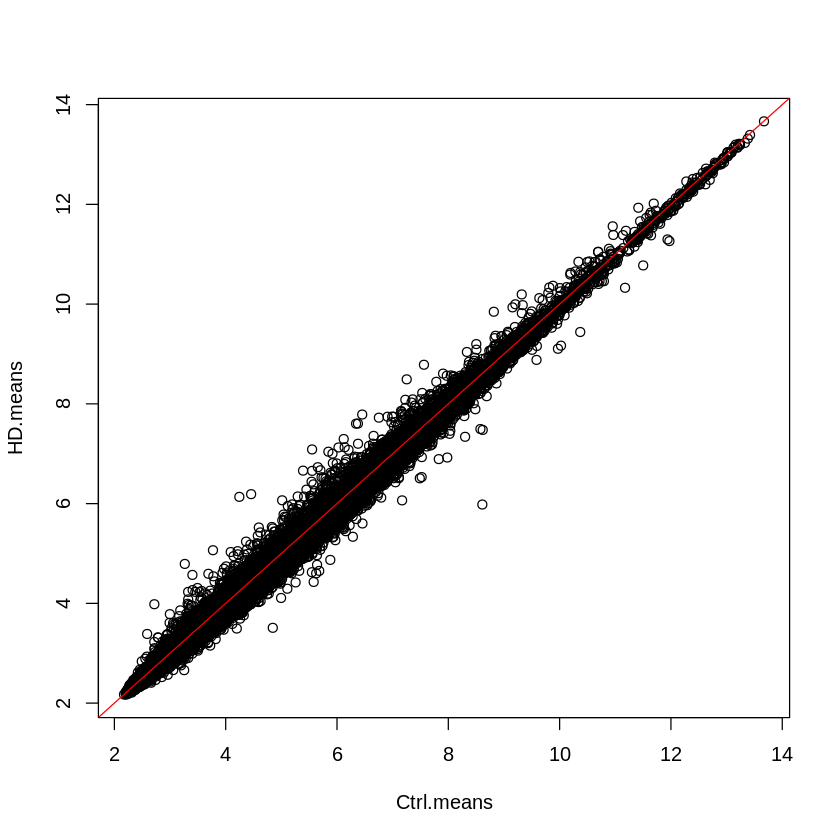

In [ ]:
plot(HD.means ~ Ctrl.means)
abline(0,1,col="red")

- The majority of the genes are similar and equal, the closer they get to the diagonal line, the closer the similarity between HD and Ctrl.
- The genes of interest are the deviating genes " the up or down regulated genes " from the diagonal. 

Computing Biological Differences

1007_s_at     1053_at      117_at      121_at   1255_g_at     1294_at 
 0.13446683  0.07963423 -0.01353598  0.09736576  0.04158920  0.08382883

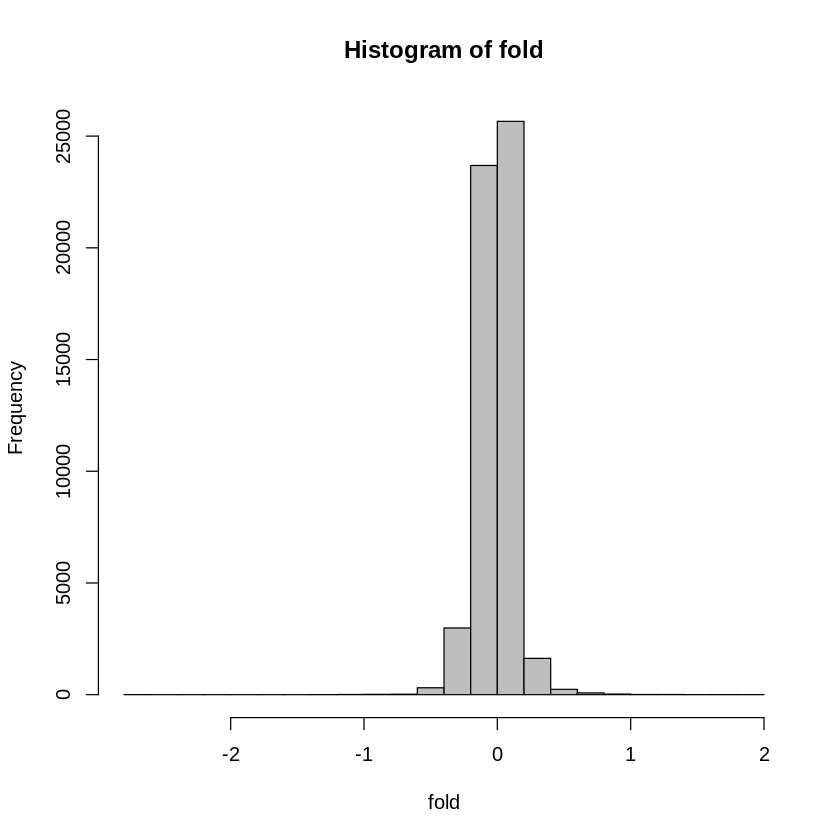

In [ ]:
fold = HD.means - Ctrl.means
head(fold)
hist(fold, col = "gray")

Computing Statistical Differences

[1] 0.1735731 0.4577190 0.9626619 0.1774300 0.1440122 0.5228844

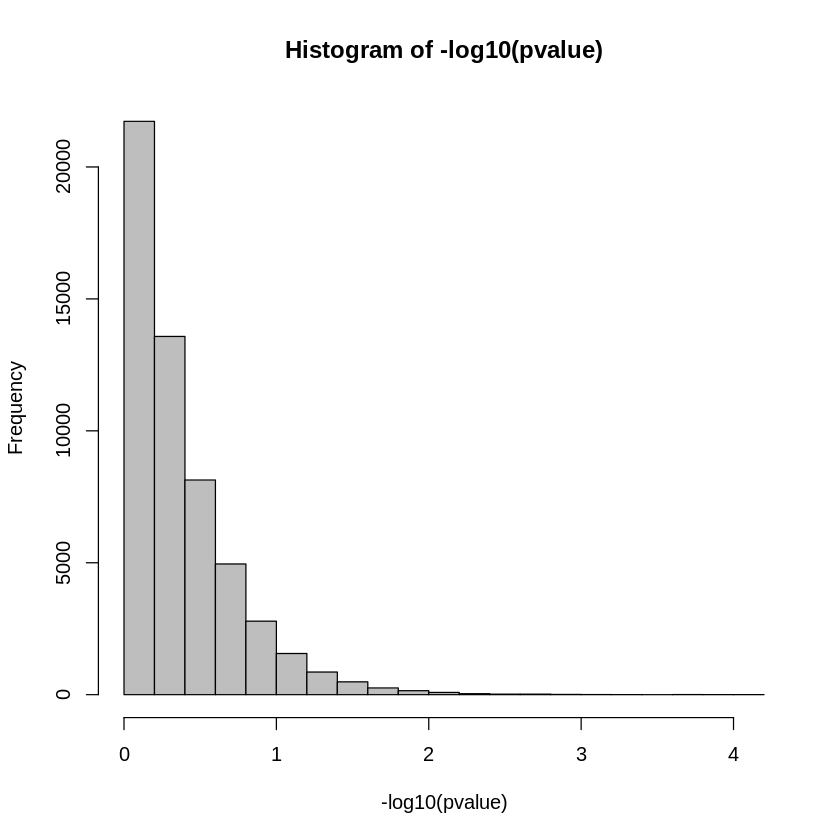

In [ ]:
pvalue = NULL
for(i in 1 : number_of_genes) {
  x = Ctrl[i, ]
  y = HD[i, ]
  t = t.test(x, y)
  pvalue[i] = t$p.value
  }
head(pvalue)
hist(-log10(pvalue), col = "gray")

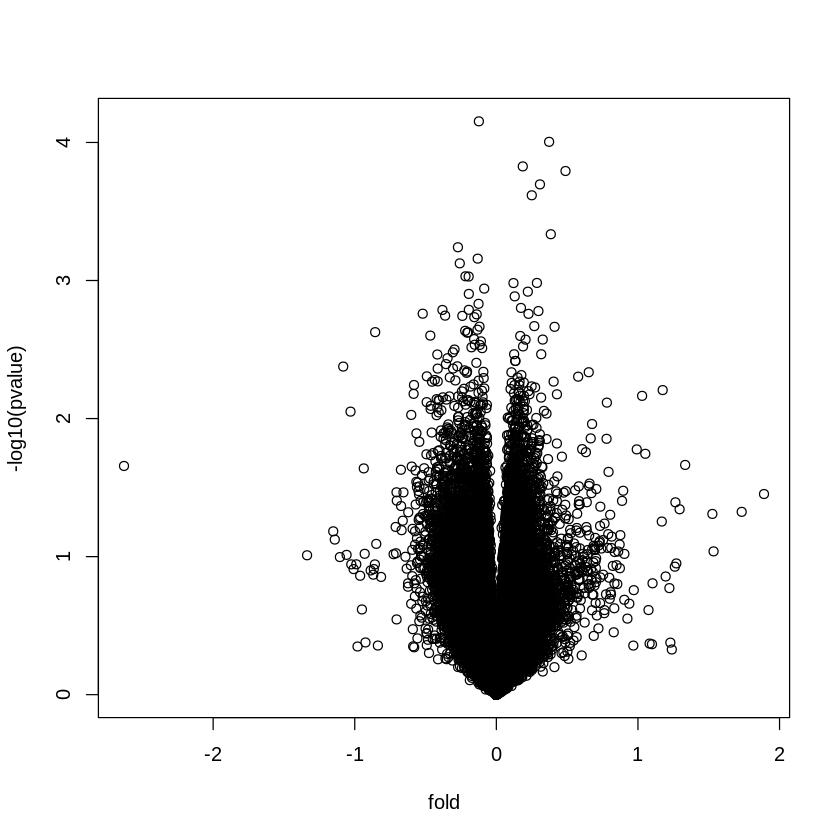

In [ ]:
plot(-log10(pvalue) ~ fold)

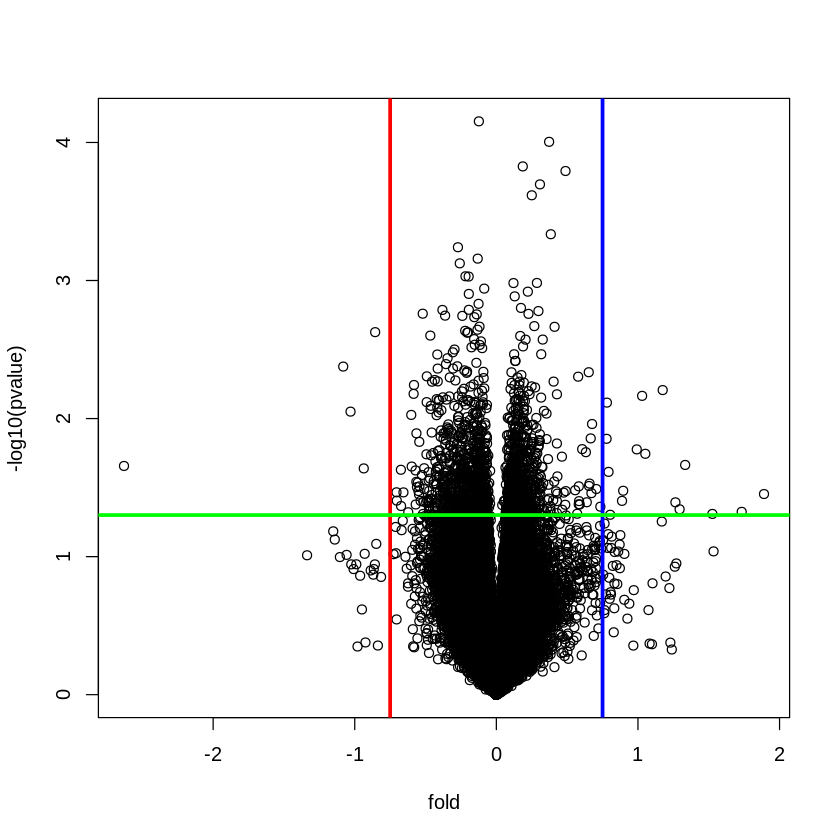

In [ ]:
fold_cutoff = 0.75
pvalue_cutoff = 0.05
plot(-log10(pvalue) ~ fold)
abline(v = fold_cutoff, col = "blue", lwd = 3)
abline(v = -fold_cutoff, col = "red", lwd = 3)
abline(h = -log10(pvalue_cutoff), col = "green", lwd = 3)

In [ ]:
filter_by_fold= abs(fold) >= fold_cutoff
sum(filter_by_fold)
filter_by_pvalue = pvalue <= pvalue_cutoff
sum(filter_by_pvalue)
filter_combined = filter_by_fold & filter_by_pvalue
sum(filter_combined)

[1] 84

[1] 1418

[1] 21

In [ ]:
filtered = data[filter_combined,]
dim(filtered)
head(filtered)

[1] 21 22

,Ctrl,Ctrl.1,Ctrl.2,Ctrl.3,Ctrl.4,Ctrl.5,Ctrl.6,Ctrl.7,Ctrl.8,Ctrl.9,⋯,HD.2,HD.3,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11
201631_s_at,5.832677,6.252007,7.716859,6.482486,6.229847,7.249946,7.160165,7.216690,4.838533,5.549573,⋯,8.933438,7.504443,9.717193,6.262424,7.821053,5.363719,7.885266,7.454840,9.263836,10.442937
202014_at,5.549030,5.497810,6.622737,5.425473,5.176517,5.719817,5.778673,5.787558,5.152459,4.722034,⋯,6.731609,5.560102,7.564873,6.055731,6.305052,5.118756,6.997920,5.684453,6.692781,9.474270
205067_at,4.127099,5.478247,5.817046,3.879314,3.584760,3.844715,3.937799,4.307943,4.096863,3.377444,⋯,6.862577,4.059184,9.541701,4.566676,4.713779,4.135004,4.449882,4.752984,9.133529,12.027028
207113_s_at,3.924762,4.204166,3.880638,3.541459,3.891907,4.047787,3.740810,3.814497,3.226425,3.441029,⋯,6.557341,3.610138,7.355901,3.476808,3.738751,3.752906,4.621185,3.848876,6.658112,9.527202
209728_at,9.298987,9.541956,9.943279,4.192236,9.344594,4.238673,9.829449,10.560170,8.972933,10.190232,⋯,4.633664,3.744651,8.891800,4.170856,3.945751,4.847440,4.090628,10.225979,3.945603,4.600746
209774_x_at,2.998935,4.152095,4.224200,3.391159,3.098871,2.881235,3.051262,3.335173,2.695221,2.823856,⋯,7.016224,3.156683,7.127935,2.689743,5.184278,2.799068,2.949944,4.095069,7.218980,9.482836


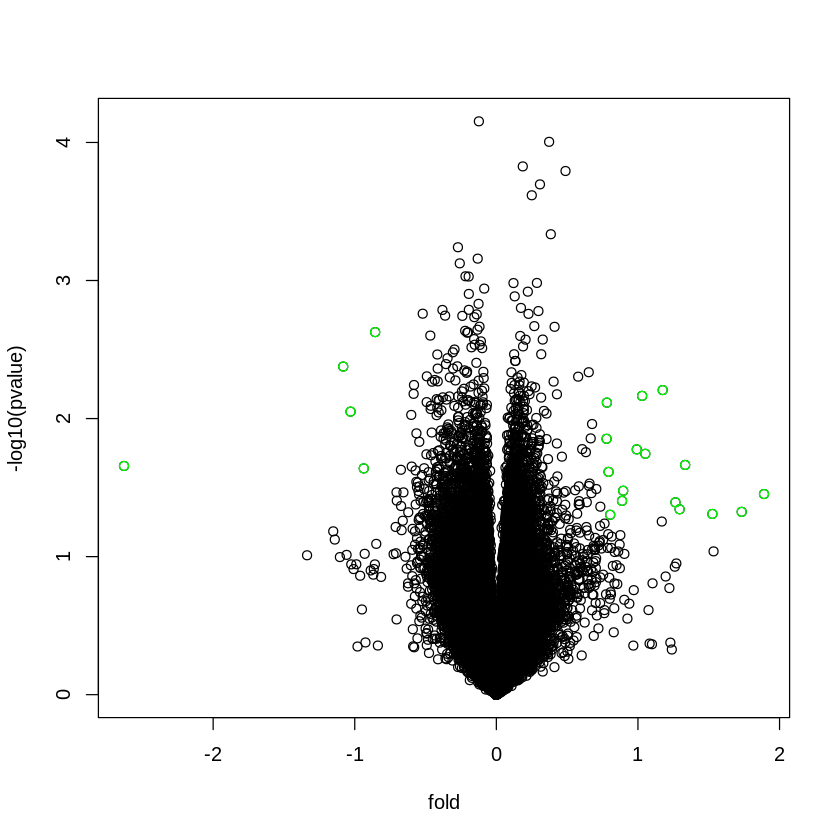

In [ ]:
plot(-log10(pvalue) ~ fold)
points(-log10(pvalue[filter_combined]) ~ fold[filter_combined], col="green")

**Up-regulated genes:**

In [ ]:
upregulated_filter = fold > fold_cutoff
upregulated_filter_combined = filter_combined & upregulated_filter
upregulated_filtered = data[upregulated_filter_combined,]
dim(upregulated_filtered)
head(upregulated_filtered)

[1] 16 22

,Ctrl,Ctrl.1,Ctrl.2,Ctrl.3,Ctrl.4,Ctrl.5,Ctrl.6,Ctrl.7,Ctrl.8,Ctrl.9,⋯,HD.2,HD.3,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11
201631_s_at,5.832677,6.252007,7.716859,6.482486,6.229847,7.249946,7.160165,7.216690,4.838533,5.549573,⋯,8.933438,7.504443,9.717193,6.262424,7.821053,5.363719,7.885266,7.454840,9.263836,10.442937
202014_at,5.549030,5.497810,6.622737,5.425473,5.176517,5.719817,5.778673,5.787558,5.152459,4.722034,⋯,6.731609,5.560102,7.564873,6.055731,6.305052,5.118756,6.997920,5.684453,6.692781,9.474270
205067_at,4.127099,5.478247,5.817046,3.879314,3.584760,3.844715,3.937799,4.307943,4.096863,3.377444,⋯,6.862577,4.059184,9.541701,4.566676,4.713779,4.135004,4.449882,4.752984,9.133529,12.027028
207113_s_at,3.924762,4.204166,3.880638,3.541459,3.891907,4.047787,3.740810,3.814497,3.226425,3.441029,⋯,6.557341,3.610138,7.355901,3.476808,3.738751,3.752906,4.621185,3.848876,6.658112,9.527202
209774_x_at,2.998935,4.152095,4.224200,3.391159,3.098871,2.881235,3.051262,3.335173,2.695221,2.823856,⋯,7.016224,3.156683,7.127935,2.689743,5.184278,2.799068,2.949944,4.095069,7.218980,9.482836
214657_s_at,5.731676,4.726104,6.498147,6.924805,6.636280,6.589272,6.867272,6.888991,4.493561,6.020443,⋯,7.688914,7.522885,7.410910,6.620950,7.348889,5.185440,7.491964,8.688263,6.567584,7.733877


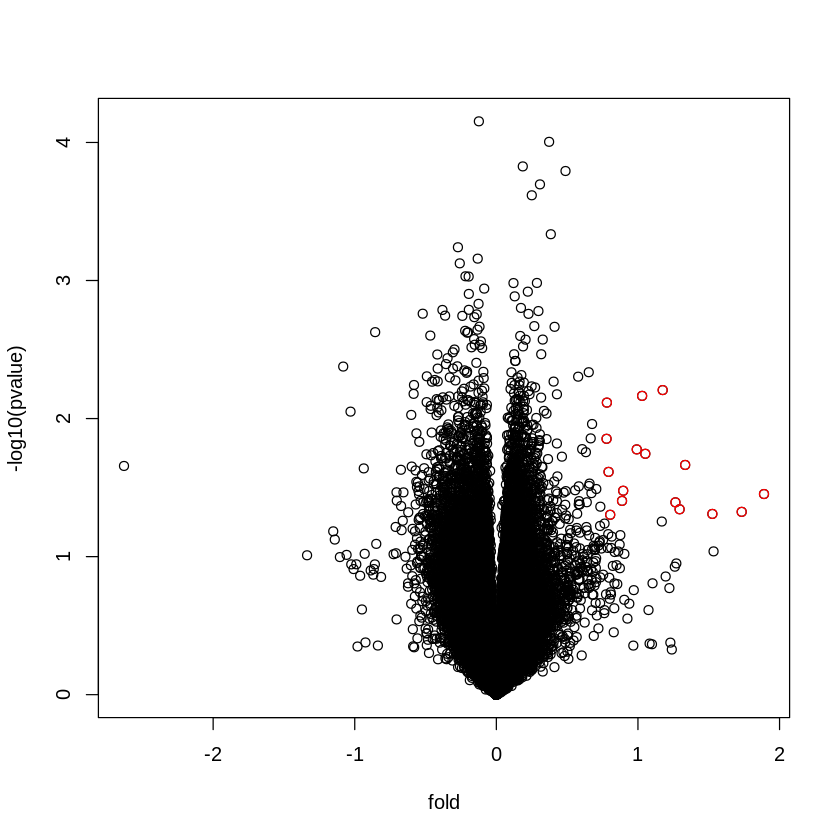

In [ ]:
plot(-log10(pvalue) ~ fold)
points(-log10(pvalue[upregulated_filter_combined]) ~ fold[upregulated_filter_combined], col="red")

**Down-regulated genes:**

In [ ]:
downregulated_filter = fold < - fold_cutoff
downregulated_filter_combined = filter_combined & downregulated_filter
downregulated_filtered = data[downregulated_filter_combined,]
dim(downregulated_filtered)
head(downregulated_filtered)

[1]  5 22

,Ctrl,Ctrl.1,Ctrl.2,Ctrl.3,Ctrl.4,Ctrl.5,Ctrl.6,Ctrl.7,Ctrl.8,Ctrl.9,⋯,HD.2,HD.3,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11
209728_at,9.298987,9.541956,9.943279,4.192236,9.344594,4.238673,9.829449,10.560170,8.972933,10.190232,⋯,4.633664,3.744651,8.891800,4.170856,3.945751,4.847440,4.090628,10.225979,3.945603,4.600746
212592_at,7.397790,8.757505,6.198739,6.969610,7.720434,7.806202,9.464921,8.527949,7.327615,8.115578,⋯,6.635094,6.002491,7.329399,6.089686,8.705336,6.236764,6.854816,7.448878,7.540403,6.450380
212671_s_at,8.135752,8.075001,8.411951,8.462088,8.164131,7.864486,8.876277,9.851329,8.733463,9.194916,⋯,7.488354,6.918110,8.613439,6.012940,8.311989,6.648033,7.072841,8.240982,7.612509,6.751055
215118_s_at,6.780309,6.456035,6.326987,5.221639,6.731127,5.822891,6.983311,6.364345,7.428639,6.460156,⋯,5.519508,5.340589,5.412349,5.277335,5.563126,7.121161,5.788115,5.527241,5.454839,5.518846
226117_at,5.585914,5.406239,5.013203,5.642537,5.983886,5.773358,6.236179,5.826601,5.487141,5.853779,⋯,5.214976,4.527241,3.925723,3.815602,5.805883,4.325314,4.255145,3.168870,6.019108,5.248691


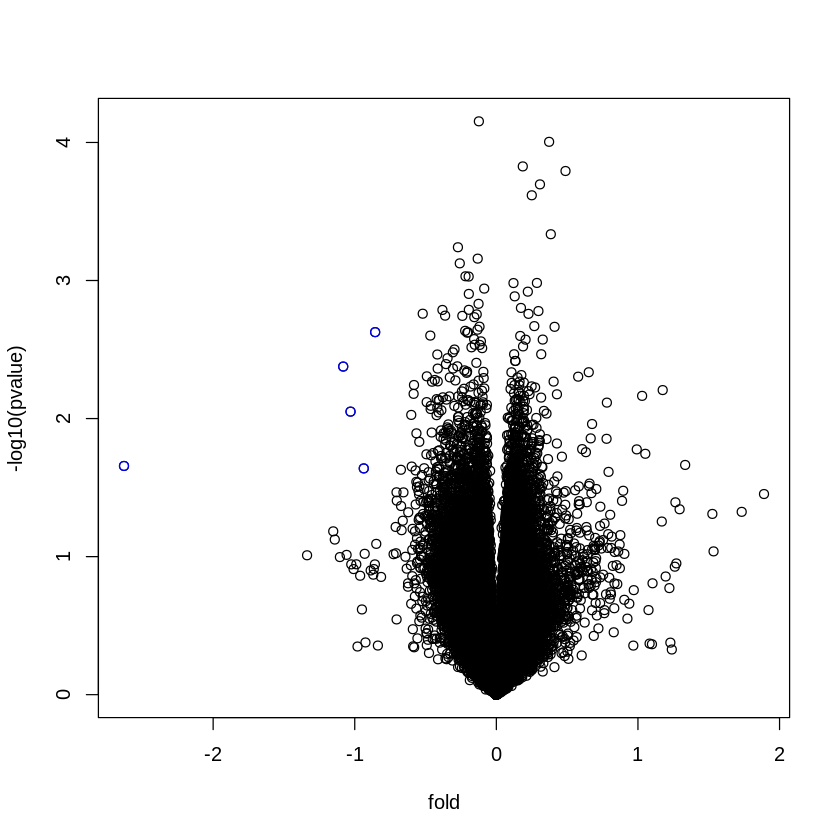

In [ ]:
plot(-log10(pvalue) ~ fold)
points(-log10(pvalue[downregulated_filter_combined]) ~ fold[downregulated_filter_combined], col="blue")

**Final data representation:**

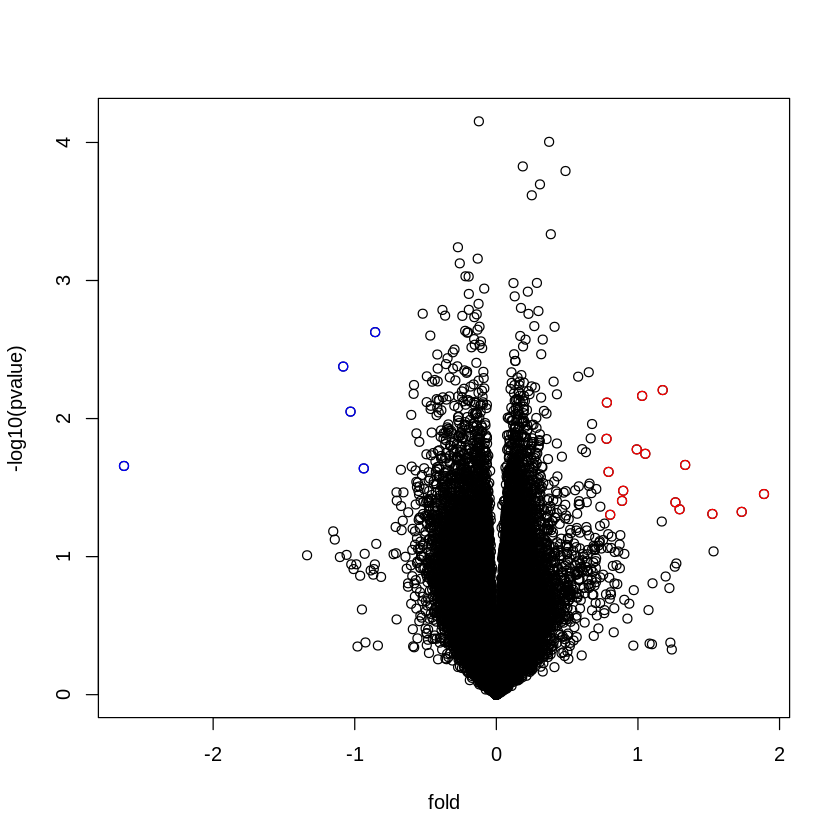

In [ ]:
plot(-log10(pvalue) ~ fold)
points(-log10(pvalue[downregulated_filter_combined]) ~ fold[downregulated_filter_combined], col="blue")
points(-log10(pvalue[upregulated_filter_combined]) ~ fold[upregulated_filter_combined], col="red")

**Heat map representation:**

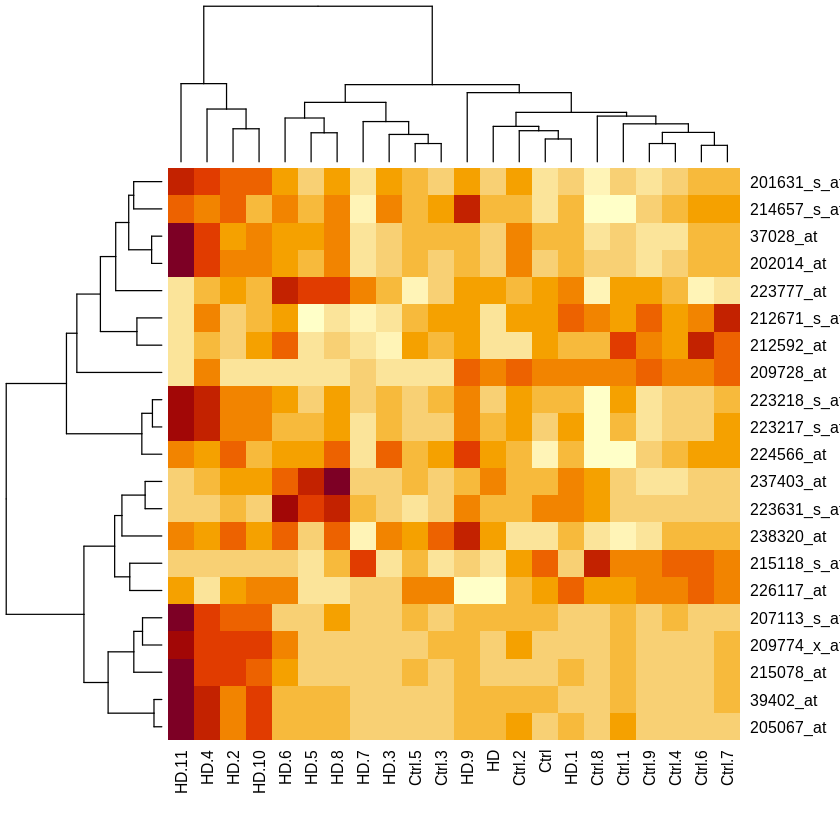

In [ ]:
heatmap(filtered)

In [ ]:
col_dendrogram = as.dendrogram(hclust(as.dist(1-cor(filtered))))
row_dendrogram = as.dendrogram(hclust(as.dist(1-cor(t(filtered)))))

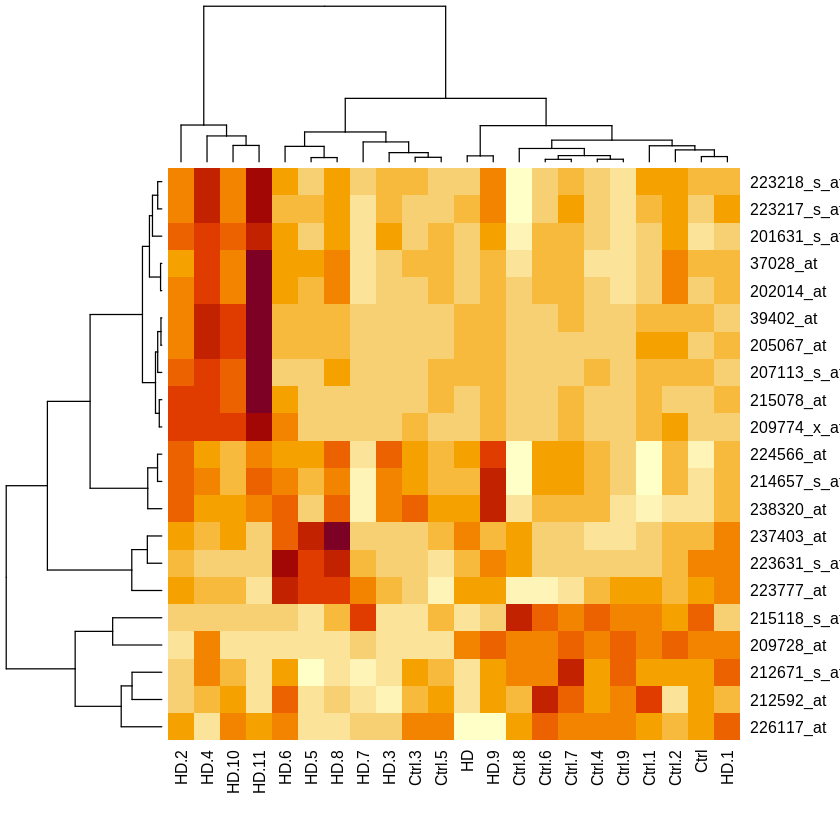

In [ ]:
heatmap(filtered, Rowv = row_dendrogram, Colv = col_dendrogram)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




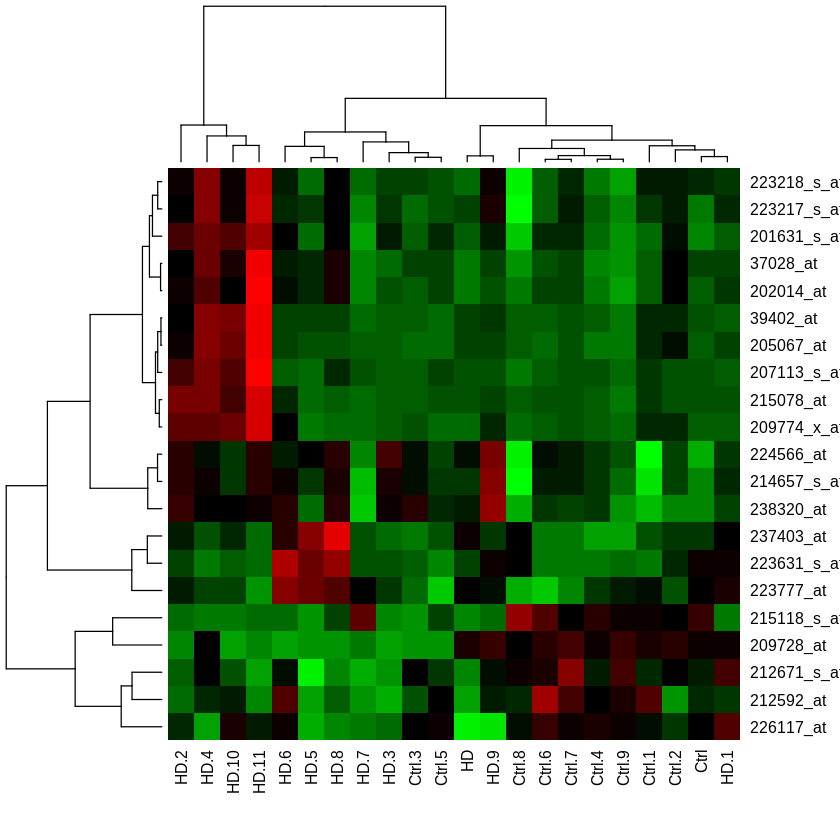

In [ ]:
install.packages("gplots")
library(gplots)
heatmap(filtered, Rowv = row_dendrogram, Colv = col_dendrogram, col = rev(redgreen(40)))

**Full list of differentially expressed genes:**

In [ ]:
filtered

,Ctrl,Ctrl.1,Ctrl.2,Ctrl.3,Ctrl.4,Ctrl.5,Ctrl.6,Ctrl.7,Ctrl.8,Ctrl.9,⋯,HD.2,HD.3,HD.4,HD.5,HD.6,HD.7,HD.8,HD.9,HD.10,HD.11
201631_s_at,5.832677,6.252007,7.716859,6.482486,6.229847,7.249946,7.160165,7.216690,4.838533,5.549573,⋯,8.933438,7.504443,9.717193,6.262424,7.821053,5.363719,7.885266,7.454840,9.263836,10.442937
202014_at,5.549030,5.497810,6.622737,5.425473,5.176517,5.719817,5.778673,5.787558,5.152459,4.722034,⋯,6.731609,5.560102,7.564873,6.055731,6.305052,5.118756,6.997920,5.684453,6.692781,9.474270
205067_at,4.127099,5.478247,5.817046,3.879314,3.584760,3.844715,3.937799,4.307943,4.096863,3.377444,⋯,6.862577,4.059184,9.541701,4.566676,4.713779,4.135004,4.449882,4.752984,9.133529,12.027028
207113_s_at,3.924762,4.204166,3.880638,3.541459,3.891907,4.047787,3.740810,3.814497,3.226425,3.441029,⋯,6.557341,3.610138,7.355901,3.476808,3.738751,3.752906,4.621185,3.848876,6.658112,9.527202
209728_at,9.298987,9.541956,9.943279,4.192236,9.344594,4.238673,9.829449,10.560170,8.972933,10.190232,⋯,4.633664,3.744651,8.891800,4.170856,3.945751,4.847440,4.090628,10.225979,3.945603,4.600746
209774_x_at,2.998935,4.152095,4.224200,3.391159,3.098871,2.881235,3.051262,3.335173,2.695221,2.823856,⋯,7.016224,3.156683,7.127935,2.689743,5.184278,2.799068,2.949944,4.095069,7.218980,9.482836
212592_at,7.397790,8.757505,6.198739,6.969610,7.720434,7.806202,9.464921,8.527949,7.327615,8.115578,⋯,6.635094,6.002491,7.329399,6.089686,8.705336,6.236764,6.854816,7.448878,7.540403,6.450380
212671_s_at,8.135752,8.075001,8.411951,8.462088,8.164131,7.864486,8.876277,9.851329,8.733463,9.194916,⋯,7.488354,6.918110,8.613439,6.012940,8.311989,6.648033,7.072841,8.240982,7.612509,6.751055
214657_s_at,5.731676,4.726104,6.498147,6.924805,6.636280,6.589272,6.867272,6.888991,4.493561,6.020443,⋯,7.688914,7.522885,7.410910,6.620950,7.348889,5.185440,7.491964,8.688263,6.567584,7.733877
215078_at,2.758936,3.323872,2.767759,2.711110,2.506841,2.862301,2.783228,2.788511,2.541049,2.136820,⋯,6.272114,2.618885,6.114153,2.430783,3.541958,2.475118,2.614734,2.991775,5.391657,7.768290


Annotation: 
https://david.ncifcrf.gov/